## Logistic Regression and Gradient Descent

Logistic regression is an excellent tool to know for classification problems. Classification problems are problems where you are trying to classify observations into groups. To make our examples more concrete, we will consider the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). The iris dataset contains 4 attributes for 3 types of iris plants. The purpose is to classify which plant you have just based on the attributes. To simplify things, we will only consider 2 attributes and 2 classes. Here are the data visually:

## About the dataset
The dataset consists the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen(13) different
measurements taken for different constituents found in the three types of
wine.

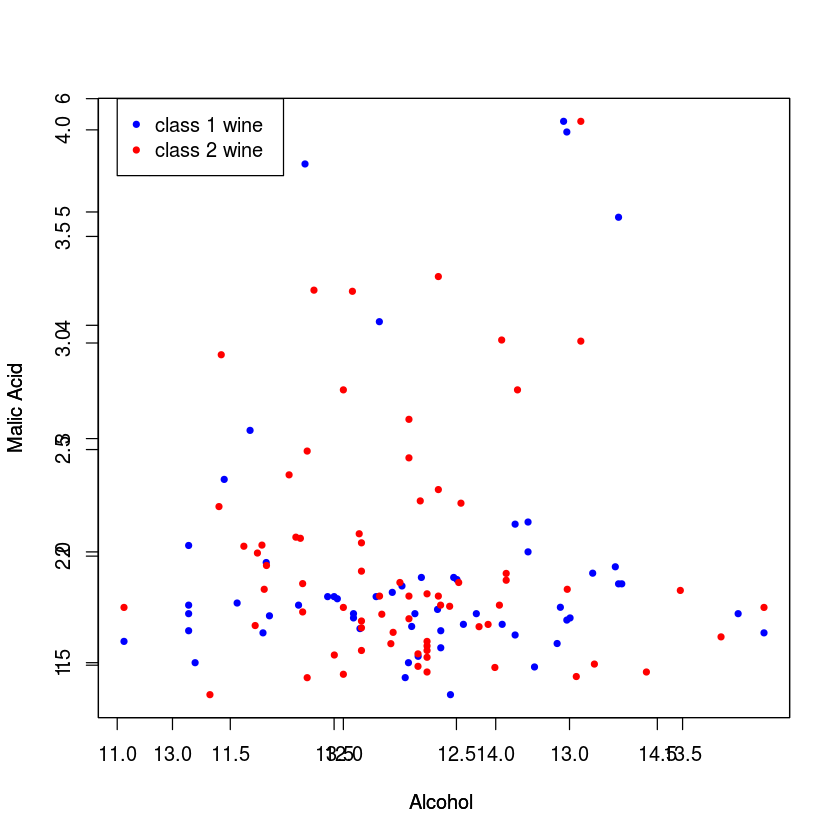

In [110]:
df <- read.table("wine_dataset.txt", sep = ",",header = TRUE, row.names = NULL)

X <- matrix(cbind(df$Alcohol[1:130],df$Malic.acid[1:130]), ncol=2) # Attributes : -1- Alcohol, -2- Malic acid
y <- matrix(df$class[1:130]) # ['class_1' 'class_2'] wine

plot(X[,1][1:59], X[,2][1:59],xlab="Alcohol ", ylab="Malic Acid", pch=20, col="blue")
par(new=TRUE)
plot(X[,1][60:130], X[,2][60:130],xlab="Alcohol ", ylab="Malic Acid", pch=20, col="red")
legend(11.0,6.0,legend=c("class 1 wine", "class 2 wine"),col=c("blue", "red"),pch = 20)
par(new=FALSE)

# Logistic Function

So we want to return a value between 0 and 1 to make sure we are actually representing a probability. To do this we will make use of the logistic function. The logistic function mathematically looks like this: $$y = \frac{1}{1 + e^{-x}}$$ Let's take a look at the plot:

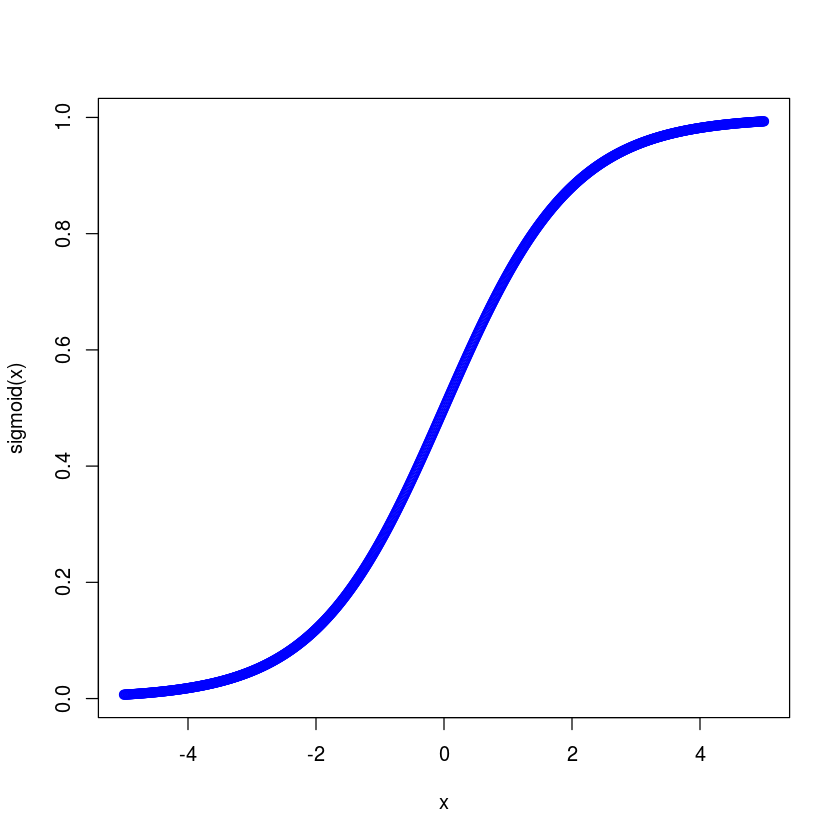

In [114]:
sigmoid = function(x) {
   1 / (1 + exp(-x))
}

# you can use the equal sign as well, the programmer way.
x <- seq(-5, 5, 0.01)
plot(x, sigmoid(x), col='blue')

You can see why this is a great function for a probability measure. The y-value represents the probability and only ranges between 0 and 1. Also, for an x value of zero you get a .5 probability and as you get more positive x values you get a higher probability and more negative x values a lower probability.

# Make use of your data

Okay - so this is nice, but how the heck do we use it? Well we know we have two attributes - Alcohol and Malic Acid - that we need to somehow use in our logistic function. One pretty obvious thing we could do is: 

$$x = \beta_{0} + \beta{1}A + \beta_{2}MA $$ 

Where 'A' is our value for alcohol width and 'MA' is our value for Malic acid. For those of you familiar with [Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) this looks very familiar. Basically we are assuming that x is a linear combination of our data plus an intercept. For example, say we have a wine with a alcoholh of 3.5 and malic acid of 5 and some oracle tells us that $\beta_{0} = 1$, $\beta_{1} = 2$, and $\beta_{2} = 4$. This would imply: 

$$x = 1 + (2 * 3.5) + (4 * 5) = 28$$ 

Plugging this into our logistic function gives: 

$$\frac{1}{1 + e^{-28}} = .99$$ 

So we would give a 99% probability to a wine with those dimensions as being Class 0 Wine.

# Learning

Okay - makes sense. But who is this oracle giving us our $\beta$ values? Good question! This is where the learning in machine learning comes in :). We will learn our $\beta$ values.

## Step 1 - Define your cost function

If you have been around machine learning, you probably hear the phrase "cost function" thrown around. Before we get to that, though, let's do some thinking. We are trying to choose $\beta$ values in order to maximize the probability of correctly classifying our wines. That is just the definition of our problem. Let's say someone did give us some $\beta$ values, how would we determine if they were good values or not? We saw above how to get the probability for one example. Now imagine we did this for all our wines observations - all 178. We would now have 178 probability scores. What we would hope is that for the Class 0 Wines, the probability values are close to 1 and for the Class 1 Wines the probability is close to 0.

But we don't care about getting the correct probability for just one observation, we want to correctly classify all our observations. If we assume our data are [independent and identically distributed](http://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables), we can just take the product of all our individually calculated probabilities and that is the value we want to maximize. So in math: $$\prod_{Class 0 Wine}\frac{1}{1 + e^{-(\beta_{0} + \beta{1}A + \beta_{2}MA)}}\prod_{Class 1 Wine}1 - \frac{1}{1 + e^{-(\beta_{0} + \beta{1}SW + \beta_{2}SL)}}$$ If we define the logistic function as: $$h(x) = \frac{1}{1 + e^{-x}}$$ and x as: $$x = \beta_{0} + \beta{1}A + \beta_{2}MA$$ This can be simplified to: $$\prod_{Class 0 Wine}h(x)\prod_{Class 1 Wine}1 - h(x)$$ 

The $\prod$ symbol means take the product for the observations classified as that Wine. Here we are making use of the fact that are data are labeled, so this is called supervised learning. Also, you will notice that for Class 1 Wine observations we are taking 1 minus the logistic function. That is because we are trying to find a value to maximize, and since Class 1 Wine observations should have a probability close to zero, 1 minus the probability should be close to 1. So now we know that we want to maximize the following: $$\prod_{Class 0 Wine}h(x)\prod_{Class 1 Wine}1 - h(x)$$ 

So we now have a value we are trying to maximize. Typically people switch this to minimization by making it negative: $$-\prod_{Class 0 Wine}h(x)\prod_{Class 1 Wine}1 - h(x)$$ Note: minimizing the negative is the same as maximizing the positive. The above formula would be called our cost function.

## Step 2 - Gradients

So now we have a value to minimize, but how do we actually find the $\beta$ values that minimize our cost function? Do we just try a bunch? That doesn't seem like a good idea...

This is where [convex optimization](http://en.wikipedia.org/wiki/Convex_optimization) comes into play. We know that the logistic cost function is [convex](http://en.wikipedia.org/wiki/Convex_function) - just trust me on this. And since it is convex, it has a single global minimum which we can converge to using [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent).

Here is an image of a convex function:

![](./convex1.gif)

Now you can imagine, that this curve is our cost function defined above and that if we just pick a point on the curve, and then follow it down to the minimum we would eventually reach the minimum, which is our goal. [Here](http://vis.supstat.com/2013/03/gradient-descent-algorithm-with-r/) is an animation of that. That is the idea behind gradient descent.

So the way we follow the curve is by calculating the gradients or the first derivatives of the cost function with respect to each $\beta$. So lets do some math. First realize that we can also define the cost function as:

$$-\sum_{i=1}^{100}y_{i}log(h(x_{i})) + (1-y_{i})log(1-h(x_{i}))$$

This is because when we take the log our product becomes a sum. See [log rules](http://www.mathwords.com/l/logarithm_rules.htm). And if we define $y_{i}$ to be 1 when the observation is Class 0 Wine and 0 when Class 1 Wine, then we only do h(x) for Class 0 Wine and 1 - h(x) for Class 1 Wine. So lets take the derivative of this new version of our cost function with respect to $\beta_{0}$. Remember that our $\beta_{0}$ is in our x value. So remember that the derivative of log(x) is $\frac{1}{x}$, so we get (for each observation): 

$$\frac{y_{i}}{h(x_{i})} + \frac{1-y_{i}}{1-h(x_{i})}$$ 

And using the [quotient rule](https://www.math.hmc.edu/calculus/tutorials/quotient_rule/) we see that the derivative of h(x) is:

$$\frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}}(1 - \frac{1}{1+e^{-x}}) = h(x)(1-h(x))$$ 

And the derivative of x with respect to $\beta_{0}$ is just 1. Putting it all together we get:

$$\frac{y_{i}h(x_{i})(1-h(x_{i}))}{h(x_{i})} - \frac{(1-y_{i})h(x_{i})(1-h(x_{i}))}{1-h(x_{i})}$$ 

Simplify to: 

$$y_{i}(1-h(x_{i})) - (1 - y_{i})h(x_{i}) = y_{i}-y_{i}h(x_{i}) - h(x_{i})+y_{i}h(x_{i}) = y_{i} - h(x_{i})$$

Bring in the neative and sum and we get the partial derivative with respect to $\beta_0$ to be:

$$\sum_{i=1}^{100}h(x_{i}) - y_{i}$$ 

Now the other partial derivaties are easy. The only change is now the derivative for $x_{i}$ is no longer 1. For $\beta_{1}$ it is $SW_{i}$ and for $\beta_{2}$ it is $SL_{i}$. So the partial derivative for $\beta_{1}$ is:

$$\sum_{i=1}^{100}(h(x_{i}) - y_{i})SW_{i}$$ 

For $\beta_{2}$: 

$$\sum_{i=1}^{100}(h(x_{i}) - y_{i})SL_{i}$$

## Step 3 - Gradient Descent

So now that we have our gradients, we can use the gradient descent algorithm to find the values for our $\beta$s that minimize our cost function. The gradient descent algorithm is very simple:
* Initially guess any values for your $\beta$ values
* Repeat until converge:
    * $\beta_{i} = \beta_{i} - (\alpha *$ gradient with respect to $\beta_{i})$ for $i = 0, 1, 2$ in our case

Here $\alpha$ is our learning rate. Basically how large of steps to take on our cost curve. What we are doing is taking our current $\beta$ value and then subtracting some fraction of the gradient. We subtract because the gradient is the direction of greatest increase, but we want the direction of greatest decrease, so we subtract. In other words, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our $\beta$ values to move closer to the minimum. Repeat until converge means keep updating our $\beta$ values until our cost value converges - or stops decreasing - meaning we have reached the minimum. Also, it is important to update all the $\beta$ values at the same time. Meaning that you use the same previous $\beta$ values to update all the next $\beta$ values.

## Gradient Descent Tricks

Most of these are from [Andrew Ng's machine learning course](https://www.coursera.org/course/ml)
* Normalize variables:
    * This means for each variable subtract the mean and divide by standard deviation.
* Learning rate:
    * If not converging, the learning rate needs to be smaller - but will take longer to converge
    * Good values to try ..., .001, .003, .01, .03, .1, .3, 1, 3, ...
* Declare converges if cost decreases by less than $10^{-3}$ (this is just a decent suggestion)
* Plot convergence as a check

# Let's see some code

Below, there is code that implements everything we discussed. It is vectorized, though, so things are represented as vectors and matricies. Also, we didn't implement an intercept (so no $\beta_{0}$) feel free to add this if you wish :)